In [8]:
import os
import pandas as pd
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32636
# path to data
example_data_path = "./data"

In [9]:
# load aggregated info we have
aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

In [10]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
            "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

In [11]:
from blocksnet import CityModel

city_model = CityModel(
  blocks=aggregated_blocks, 
  accessibility_matrix=accessibility_matrix, 
  services=services
)

In [12]:
from blocksnet.method.provision import LpProvision
lpp = LpProvision(city_model=city_model)

In [13]:
scenario = {
  'hospitals':0.25, 
  'pharmacies':0.5, 
  'policlinics':0.25
}
provisions, mean = lpp.get_scenario_provisions(scenario)
print(f'Mean provision: {mean : .3f}')

Mean provision:  0.815


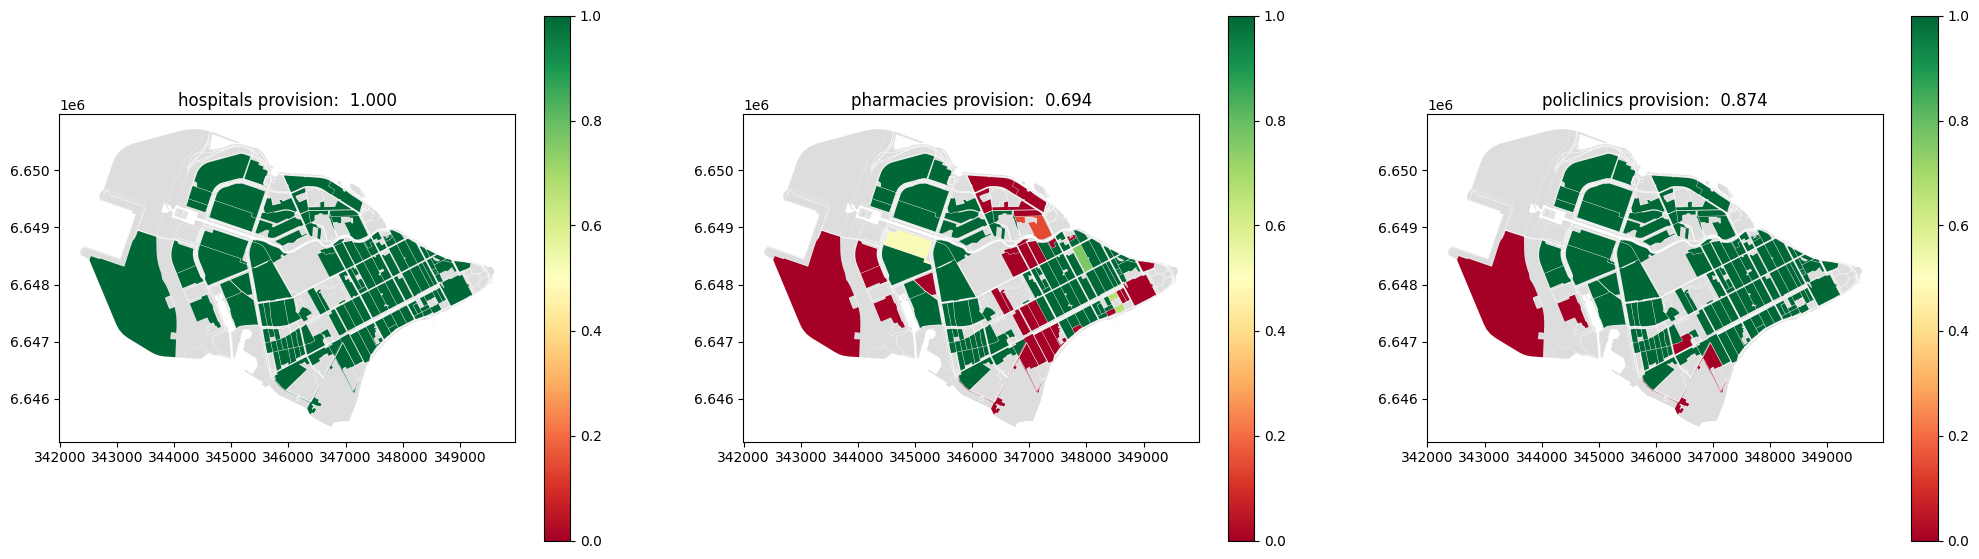

In [14]:
lpp.visualize_provisions(provisions)

In [15]:
updated_blocks = {
  218: {
  'population': 1000,
  'hospitals': 0,
  'pharmacies': 1000,
  'policlinics': 0,
  },
  30: {
    'pharmacies': 150 
  }
}

In [16]:
provisions, mean = lpp.get_scenario_provisions(scenario, updated_blocks)
print(f'Mean provision: {mean : .3f}')

Mean provision:  0.818


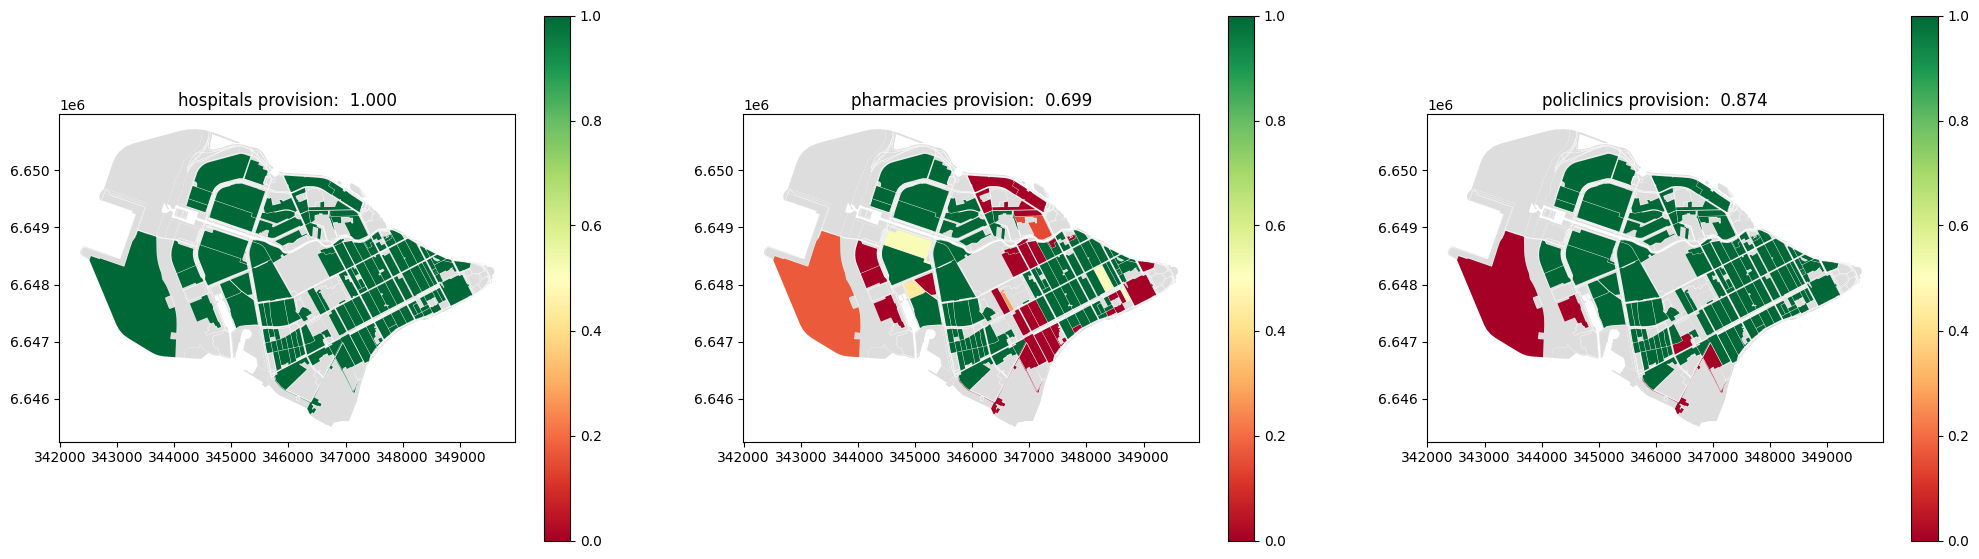

In [17]:
lpp.visualize_provisions(provisions, updated_blocks)